---
date: '2024-04-16'
description: Linear Regression from PRML Example 1 from Chapter 1 Introdcution
categories:
- ML foundation
- bayesian
- PyTorch
toc: true
output-file: linear-regression-from-scratch.html
title: Linear Regression from Scratch
---

# Chapter 1

### 1.1. Example: Polynomial Curve Fitting

In [1]:
import torch

In [2]:
x_train = torch.linspace(0, 1, 20)
y_train = torch.sin(2*3.14*x_train) + torch.normal(0,0.2,x_train.shape,) ## added noise as per the book

### testing data
x_test = torch.linspace(0, 1, 200)
y_test = torch.sin(2*3.14*x_test) 

## plot training data

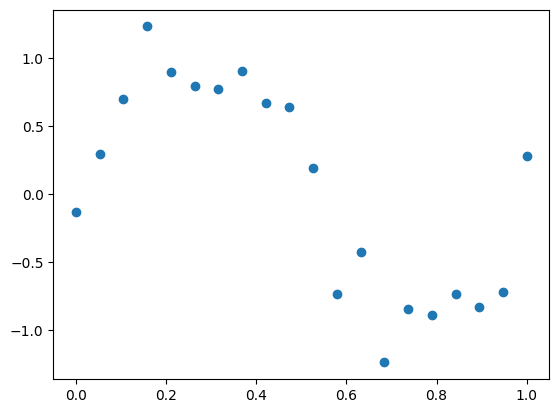

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)

## Fit the Linear model on Training data

To solve for the optimal weight matrix \( W \), given the expression \( (XW - Y)^T (XW - Y) \), we can proceed by first expanding the expression and then minimizing it with respect to \( W \).

### Step 1: Expand the expression

Given:
$$
L(W) = (XW - Y)^T (XW - Y)
$$

Expanding this:
$$
L(W) = (XW)^T(XW) - (XW)^T Y - Y^T (XW) + Y^T Y
$$

Simplifying further:
$$
L(W) = W^T X^T XW - W^T X^T Y - Y^T XW + Y^T Y
$$

Since \( W^T X^T Y \) and \( Y^T XW \) are scalars, they are equal. Therefore:
$$
L(W) = W^T X^T XW - 2W^T X^T Y + Y^T Y
$$

### Step 2: Minimize the expression with respect to \( W \)

To find the optimal \( W \), take the derivative of \( L(W) \) with respect to \( W \) and set it to zero:
$$
\frac{\partial L(W)}{\partial W} = 2X^T XW - 2X^T Y = 0
$$

Simplifying:
$$
X^T XW = X^T Y
$$

Finally, solve for \( W \):
$$
W = (X^T X)^{-1} X^T Y
$$

### Final Answer

The optimal weight matrix \( W \) is given by:
$$
\boxed{W = (X^T X)^{-1} X^T Y}
$$

This result is commonly known as the **Normal Equation** in linear regression.


In [15]:
powers = torch.arange(5).float()
x_poly = x_train.unsqueeze(-1).pow(powers) ## NxM
w = torch.linalg.pinv(x_poly) @ y_train.view(-1,1) ## MxN * Nx1 == Mx1

In [16]:
w.shape, x_test.shape

(torch.Size([5, 1]), torch.Size([200]))

In [17]:
x_poly_test = x_test.unsqueeze(-1).pow(powers)
y_pred = x_poly_test @ w

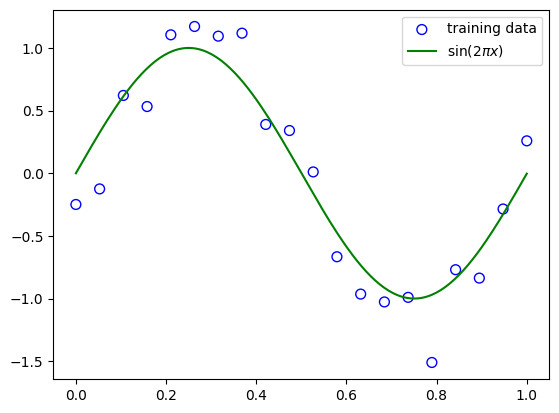

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()


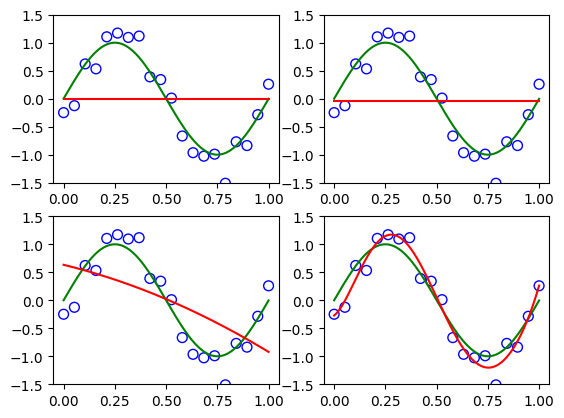

In [19]:
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    powers = torch.arange(degree).float()
    x_poly = x_train.unsqueeze(-1).pow(powers) ## NxM
    w = torch.linalg.pinv(x_poly) @ y_train.view(-1,1) ## MxN * Nx1 == Mx1
    x_poly_test = x_test.unsqueeze(-1).pow(powers)
    y_pred = x_poly_test @ w    

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y_pred, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))

## 1.1. Example: Polynomial Curve Fitting with Regularization
One technique that is often
used to control the over-fitting phenomenon in such cases is that of regularization,
which involves adding a penalty term to the error function in order to discourage
the coefficients from reaching large values. The simplest such penalty term takes the
form of a sum of squares of all of the coefficients, leading to a modified error function
of the form.

Techniques such as this are known
in the statistics literature as shrinkage methods because they reduce the value of the
coefficients. The particular case of a quadratic regularizer is called ridge regression (Hoerl and Kennard, 1970). In the context of neural networks, this approach is
known as weight decay

To solve for the optimal weight matrix \( W \) given the objective function \( (XW - Y)^T (XW - Y) + W^T W \), follow these steps:

### Objective Function

The objective function is:
$$
L(W) = (XW - Y)^T (XW - Y) + W^T W
$$

### Step 1: Expand the Expression

Expanding \( (XW - Y)^T (XW - Y) \):
$$
(XW - Y)^T (XW - Y) = (XW)^T XW - (XW)^T Y - Y^T XW + Y^T Y
$$

Since \( (XW)^T Y \) and \( Y^T XW \) are scalars and equal, this simplifies to:
$$
(XW - Y)^T (XW - Y) = W^T X^T XW - 2W^T X^T Y + Y^T Y
$$

Adding \( W^T W \):
$$
L(W) = W^T X^T XW - 2W^T X^T Y + Y^T Y + W^T W
$$

Combining like terms:
$$
L(W) = W^T (X^T X + I) W - 2W^T X^T Y + Y^T Y
$$

### Step 2: Minimize the Expression with Respect to \( W \)

Take the derivative of \( L(W) \) with respect to \( W \) and set it to zero:
$$
\frac{\partial L(W)}{\partial W} = 2(X^T X + I)W - 2X^T Y = 0
$$

Solving for \( W \):
$$
(X^T X + I)W = X^T Y
$$
$$
W = (X^T X + I)^{-1} X^T Y
$$

### Final Answer

The optimal weight matrix \( W \) is:
$$
\boxed{W = (X^T X + I)^{-1} X^T Y}
$$

This result includes a regularization term \( W^T W \), which is common in **Ridge Regression** or **Tikhonov Regularization**.


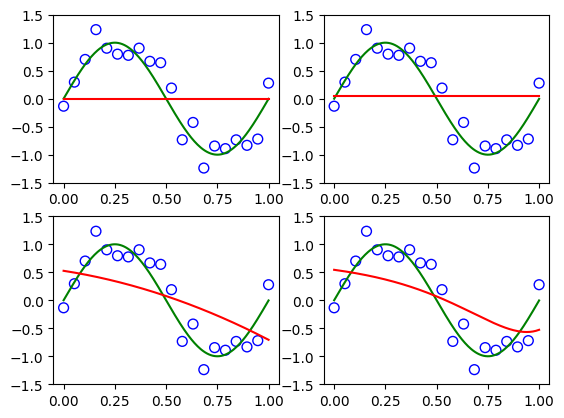

In [4]:
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    powers = torch.arange(degree).float()
    x_poly = x_train.unsqueeze(-1).pow(powers) ## NxM
    N,M = x_poly.shape

    w = (torch.linalg.inv(x_poly.T@x_poly + torch.eye(M))@x_poly.T) @ y_train.view(-1,1) ## MxN * Nx1 == Mx1
    x_poly_test = x_test.unsqueeze(-1).pow(powers)
    y_pred = x_poly_test @ w    

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y_pred, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))